In [241]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Importing dataset for training and testing

In [242]:
train = pd.read_csv(r"E:\Study\ML\NN_from_scratch\train.csv")
test = pd.read_csv(r"E:\Study\ML\NN_from_scratch\test.csv")

In [243]:
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]
X_train = np.array(X_train)
Y_train = np.array(Y_train)
#Feature scaling
X_train = X_train/255
X_train = X_train.T

X_test = test.iloc[:,0:]
X_test = np.array(X_test)
#Feature scaling
X_test = X_test/255
X_test = X_test.T
print(X_test.shape)
print(X_train.shape)

(784, 28000)
(784, 42000)


In [244]:
Y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

We will make a neural network with 1 hidden layer of 20 neurons. Output layer will have 10 nodes, each representing a number from 0-9. 784 is the number of input features (pixel values).

**Forward Propagation**

Z[1]=W[1]X+b[1]

A[1]=gReLU(Z[1]))

Z[2]=W[2]A[1]+b[2]

A[2]=gsoftmax(Z[2])

**Backward Propagation**

dZ[2]=A[2]−Y
 
dW[2]=1/mdZ[2]A[1]T
 
dB[2]=1/mΣdZ[2]
 
dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
 
dW[1]=1/mdZ[1]A[0]T
 
dB[1]=1/mΣdZ[1]

**Shapes of matrices**

A[0] = X : 784 x mt

A[1] ~ Z[1] : 20 x mt

W1 : 20 x 784

B1 : 20 x 1

A[2] ~ Z[2] : 10 x mt

W2 : 10 x 20

B2 : 10 x 1

dZ2 : 10 x mt

dW2 : 10 x 20

dB2 : 10 x 1

dZ1 : 20 x mt

dW1 : 20 x 784

dB1 : 20 x 1

In [245]:
#Initialise parameters

def init_params():
    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#Defining ReLU and Softmax
#We will use softmax activation function in output layer as we have a multiclass classification problem.

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    ans = np.exp(Z) / sum(np.exp(Z))
    return ans

#Defining derivative of ReLU as it will be used in backward propagation
def deriv_ReLU(Z):
    return(Z>0)

#One hot encoding the output Y
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#forward propagation
def for_prop(W1,B1,W2,B2,X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    return dW1, dB1, dW2, dB2

#Updating parameters for gradient descent
def update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha):
    W1 -= alpha * dW1
    B1 -= alpha * dB1
    W2 -= alpha * dW2
    B2 -= alpha * dB2
    return W1, B1, W2, B2

#Taking prediction from output layer
def predictions(A2):
    return np.argmax(A2,0)

#Measuring accuracy
def accuracy(predictions,Y):
    return np.sum(predictions == Y) / Y.size

#Implementing Gradient Descent using above functions
def grad_des(X,Y,alpha,itr):
    W1,B1,W2,B2 = init_params()
    for i in range(itr):
        Z1, A1, Z2, A2 = for_prop(W1,B1,W2,B2,X)
        dW1, dB1, dW2, dB2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1, B1, W2, B2 = update_params(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha)
        if i % 20 == 0:
            print("Iteration: ", i)
            preds = predictions(A2)
            print(accuracy(preds, Y))
    return W1, B1, W2, B2

In [246]:
#Making predictions on new data
def make_predictions(W1, B1, W2, B2, X):
    Z1, A1, Z2, A2 = for_prop(W1, B1, W2, B2, X)
    preds = predictions(A2)
    return preds

#Function to test the network on a particular image of training set
def test_prediction(X, Y, index, W1, B1, W2, B2):
    current_image = X[:, index, None]
    prediction = make_predictions(W1, B1, W2, B2, X[:, index, None])
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [247]:
W1, B1, W2, B2 = grad_des(X_train, Y_train, 0.10, 500)

Iteration:  0
0.0673095238095238
Iteration:  20
0.401
Iteration:  40
0.5867380952380953
Iteration:  60
0.6681666666666667
Iteration:  80
0.7141904761904762
Iteration:  100
0.7419285714285714
Iteration:  120
0.7601190476190476
Iteration:  140
0.7766904761904762
Iteration:  160
0.7898095238095239
Iteration:  180
0.801404761904762
Iteration:  200
0.8101666666666667
Iteration:  220
0.817952380952381
Iteration:  240
0.8249761904761905
Iteration:  260
0.8304523809523809
Iteration:  280
0.8354285714285714
Iteration:  300
0.8396904761904762
Iteration:  320
0.8435476190476191
Iteration:  340
0.8476666666666667
Iteration:  360
0.8507142857142858
Iteration:  380
0.8532619047619048
Iteration:  400
0.8562142857142857
Iteration:  420
0.8590476190476191
Iteration:  440
0.8612857142857143
Iteration:  460
0.8631190476190476
Iteration:  480
0.8648571428571429


An observation is that the way we initialize the parameters W1,B1,W2,B2 affects the performance drastically.
When initialized with standard normal distribution, accuracy was about 54% whereas when initialised by uniform density from -0.5 to 0.5, the accuracy was 87%.
The reason behind this could be that for standard normal distribution very small values (even 0) are very likely to be selected. This may lead to symmetry between nodes of a layer consequently losing efficiency.

Prediction:  [1]
Label:  1


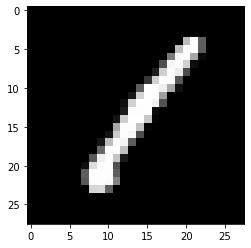

In [248]:
test_prediction(X_train,Y_train,0,W1,B1,W2,B2)

Prediction:  [4]
Label:  4


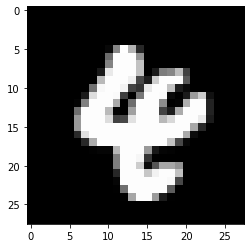

In [250]:
test_prediction(X_train,Y_train,1224,W1,B1,W2,B2)

In [251]:
val_predictions = make_predictions(W1,B1,W2,B2,X_test)

In [252]:
print(val_predictions)

[2 0 8 ... 3 9 2]


Let's now create an output csv file for submission on kaggle

In [254]:
ImageID = []
for i in range(1,X_test.shape[1]+1):
    ImageID.append(i)
output = pd.DataFrame({'ImageID' : ImageID, 'Label' : val_predictions})
output.to_csv('submission.csv', index=False)

After making submission in the kaggle competition, the final accuracy for test set comes out to be **86.19%**.
For a neural network implemented from scratch with only 1 hidden layer, I think it performed very well.

The final output can be improved by tuning parameters such as alpha and number of iterations for gradient descent.
Increasing number of neurons and number of hidden layers will definitely improve the performance.